In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
standard_scaler = StandardScaler()

In [1]:
# Mount Google drive and copy kaggle.json to local disk

from google.colab import drive
drive.mount('mount')

!cp mount/MyDrive/kaggle.json .

Mounted at mount


In [2]:
!KAGGLE_CONFIG_DIR=$(pwd) kaggle datasets download rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 44.7MB/s]


In [3]:
!unzip -o students-performance-dataset.zip -d students-performance-dataset

Archive:  students-performance-dataset.zip
  inflating: students-performance-dataset/Student_performance_data _.csv  


In [6]:
student_performance_df_orig = pd.read_csv('students-performance-dataset/Student_performance_data _.csv')

In [9]:
student_performance_df = student_performance_df_orig.drop(['StudentID', 'GradeClass', 'GPA'], axis=1)
student_performance_df = pd.DataFrame(standard_scaler.fit_transform(student_performance_df), columns=student_performance_df.columns)
student_performance_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866
3,0.472919,0.978492,-0.853391,1.253509,0.045445,-0.063951,-0.656870,0.782063,1.268269,-0.660132,-0.495161,-0.431866
4,0.472919,0.978492,-0.853391,0.253711,-0.902311,0.290422,1.522371,0.782063,-0.788476,-0.660132,-0.495161,-0.431866
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1.362944,0.978492,-0.853391,1.253509,0.160762,-1.481445,-0.656870,1.672869,1.268269,-0.660132,-0.495161,-0.431866
2388,0.472919,-1.021981,-0.853391,-0.746087,-0.387285,-1.245196,1.522371,1.672869,-0.788476,1.514848,-0.495161,-0.431866
2389,-0.417106,0.978492,-0.853391,0.253711,-0.524895,0.644796,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,2.315535
2390,-0.417106,0.978492,0.119125,-1.745885,0.467950,0.290422,-0.656870,-0.108744,-0.788476,1.514848,2.019544,-0.431866


In [13]:
student_performance_target = np.array(student_performance_df_orig['GradeClass'].map(lambda gradeclass: 0 if gradeclass <= 3.0 else 1), dtype=np.int8)
student_performance_target

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [22]:
!python3 -m pip install uv
!uv pip install catboost lightgbm xgboost --system

Using Python 3.10.12 environment at /usr
Resolved 22 packages in 577ms
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠹ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠸ Preparing packages... (0/1)
⠼ Preparing packages... (0/1)
⠼ Preparing packages... (0/1)

In [36]:
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

ada_estimator = DecisionTreeClassifier(max_depth=1, max_features=0.06)
adaboost = AdaBoostClassifier(estimator=ada_estimator,
                       n_estimators=500,
                       learning_rate=0.5,
                       random_state=1234)

catboost = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1)

decisiontree = DecisionTreeClassifier(max_depth=12, random_state=1234)

randomforest = RandomForestClassifier(n_estimators=500,
                           max_features=0.06,
                           n_jobs=6,
                           random_state=1234)

xgboost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(student_performance_df, student_performance_target, test_size=0.3, random_state=42)

adaboost.fit(X_train, y_train)
catboost.fit(X_train, y_train)
decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

lightgbm = lgb.train({
    'objective': 'binary',
    'metric': 'binary_error',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'n_estimators': 100,
    'valid_sets': [test_data],
}, train_data)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0:	learn: 0.6395201	total: 2.44ms	remaining: 241ms
1:	learn: 0.5953257	total: 3.73ms	remaining: 183ms
2:	learn: 0.5575825	total: 5.48ms	remaining: 177ms
3:	learn: 0.5282134	total: 6.98ms	remaining: 167ms
4:	learn: 0.5015223	total: 8.84ms	remaining: 168ms
5:	learn: 0.4813980	total: 9.81ms	remaining: 154ms
6:	learn: 0.4594546	total: 11.1ms	remaining: 147ms
7:	learn: 0.4403051	total: 12.3ms	remaining: 142ms
8:	learn: 0.4251923	total: 13.7ms	remaining: 138ms
9:	learn: 0.4121058	total: 14.9ms	remaining: 134ms
10:	learn: 0.4024542	total: 16ms	remaining: 129ms
11:	learn: 0.3921146	total: 17.2ms	remaining: 126ms
12:	learn: 0.3823390	total: 18.5ms	remaining: 124ms
13:	learn: 0.3754457	total: 19.6ms	remaining: 120ms
14:	learn: 0.3660848	total: 20.9ms	remaining: 118ms
15:	learn: 0.3579462	total: 22.3ms	remaining: 117ms
16:	learn: 0.3526145	total: 23.5ms	remaining: 115ms
17:	learn: 0.3462003	total: 24.8ms	remaining: 113ms
18:	learn: 0.3428394	total: 26ms	remaining: 111ms
19:	learn: 0.3384516	total

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: 0x7f8b3bfc5150>
[LightGBM] [Warning] Unknown parameter: valid_sets
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: valid_sets
[LightGBM] [Warning] Unknown parameter: object
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x7f8b3b578dc0>
[LightGBM] [Info] Number of positive: 854, number of negative: 820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510155 -> initscore=0.040627
[LightGBM] [Info] Start training from score 0.040627


In [77]:
from sklearn.model_selection import cross_val_score

adaboost_val_score = cross_val_score(adaboost, X_test.values, y_test, cv=2, scoring='accuracy')
catboost_val_score = cross_val_score(catboost, X_test.values, y_test, cv=2, scoring='accuracy')
decisiontree_val_score = cross_val_score(decisiontree, X_test.values, y_test, cv=2, scoring='accuracy')
randomforest_val_score = cross_val_score(randomforest, X_test.values, y_test, cv=2, scoring='accuracy')
xgboost_val_score = cross_val_score(xgboost, X_test.values, y_test, cv=2, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0:	learn: 0.6413116	total: 332us	remaining: 32.9ms
1:	learn: 0.5998944	total: 639us	remaining: 31.3ms
2:	learn: 0.5618193	total: 907us	remaining: 29.4ms
3:	learn: 0.5292351	total: 1.58ms	remaining: 37.9ms
4:	learn: 0.4983464	total: 1.83ms	remaining: 34.7ms
5:	learn: 0.4760060	total: 2.35ms	remaining: 36.9ms
6:	learn: 0.4537610	total: 2.88ms	remaining: 38.2ms
7:	learn: 0.4316761	total: 3.37ms	remaining: 38.8ms
8:	learn: 0.4161534	total: 3.88ms	remaining: 39.2ms
9:	learn: 0.3996780	total: 4.37ms	remaining: 39.3ms
10:	learn: 0.3885836	total: 4.88ms	remaining: 39.5ms
11:	learn: 0.3754278	total: 5.4ms	remaining: 39.6ms
12:	learn: 0.3659297	total: 6.08ms	remaining: 40.7ms
13:	learn: 0.3562188	total: 6.72ms	remaining: 41.3ms
14:	learn: 0.3463387	total: 7.34ms	remaining: 41.6ms
15:	learn: 0.3390833	total: 7.87ms	remaining: 41.3ms
16:	learn: 0.3296815	total: 8.39ms	remaining: 40.9ms
17:	learn: 0.3218617	total: 8.88ms	remaining: 40.5ms
18:	learn: 0.3180378	total: 9.37ms	remaining: 39.9ms
19:	lea

In [78]:
print(f"adaboost val score: {adaboost_val_score}")
print(f"catboost val score: {catboost_val_score}")
print(f"decisiontree val score: {decisiontree_val_score}")
print(f"randomforest val score: {randomforest_val_score}")
print(f"xgboost val score: {xgboost_val_score}")

adaboost val score: [0.8551532  0.84679666]
catboost val score: [0.88300836 0.88579387]
decisiontree val score: [0.83286908 0.83286908]
randomforest val score: [0.88579387 0.88300836]
xgboost val score: [0.86908078 0.88300836]


In [82]:
from sklearn.model_selection import cross_val_predict

adaboost_predicted_target = cross_val_predict(adaboost, X_test.values, y_test, cv=2)
catboost_predicted_target = cross_val_predict(catboost, X_test.values, y_test, cv=2)
decisiontree_predicted_target = cross_val_predict(decisiontree , X_test.values, y_test, cv=2)
randomforest_predicted_target = cross_val_predict(randomforest , X_test.values, y_test, cv=2)
lightgbm_predicted_proba_target = lightgbm.predict(X_test, num_iteration=lightgbm.best_iteration)
lightgbm_predicted_target = [1 if prob > 0.5 else 0 for prob in lightgbm_predicted_proba_target]
xgboost_predicted_target = cross_val_predict(xgboost, X_test.values, y_test, cv=2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0:	learn: 0.6413116	total: 1.03ms	remaining: 103ms
1:	learn: 0.5998944	total: 2.64ms	remaining: 130ms
2:	learn: 0.5618193	total: 3.14ms	remaining: 102ms
3:	learn: 0.5292351	total: 3.94ms	remaining: 94.6ms
4:	learn: 0.4983464	total: 4.66ms	remaining: 88.6ms
5:	learn: 0.4760060	total: 5.3ms	remaining: 83.1ms
6:	learn: 0.4537610	total: 6.09ms	remaining: 80.9ms
7:	learn: 0.4316761	total: 6.74ms	remaining: 77.5ms
8:	learn: 0.4161534	total: 7.45ms	remaining: 75.3ms
9:	learn: 0.3996780	total: 8.02ms	remaining: 72.2ms
10:	learn: 0.3885836	total: 8.65ms	remaining: 70ms
11:	learn: 0.3754278	total: 9.4ms	remaining: 68.9ms
12:	learn: 0.3659297	total: 9.99ms	remaining: 66.9ms
13:	learn: 0.3562188	total: 10.6ms	remaining: 65.2ms
14:	learn: 0.3463387	total: 11.4ms	remaining: 64.4ms
15:	learn: 0.3390833	total: 12ms	remaining: 63.1ms
16:	learn: 0.3296815	total: 12.8ms	remaining: 62.5ms
17:	learn: 0.3218617	total: 13.4ms	remaining: 61.1ms
18:	learn: 0.3180378	total: 14.1ms	remaining: 59.9ms
19:	learn: 0

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(adaboost_predicted_target, y_test)

array([[306,  52],
       [ 55, 305]])

In [52]:
confusion_matrix(catboost_predicted_target, y_test)

array([[311,  33],
       [ 50, 324]])

In [53]:
confusion_matrix(decisiontree_predicted_target, y_test)

array([[306,  65],
       [ 55, 292]])

In [54]:
confusion_matrix(randomforest_predicted_target, y_test)

array([[317,  39],
       [ 44, 318]])

In [83]:
confusion_matrix(lightgbm_predicted_target, y_test)

array([[307,  26],
       [ 54, 331]])

In [55]:
confusion_matrix(xgboost_predicted_target, y_test)

array([[315,  43],
       [ 46, 314]])

In [84]:
from sklearn.metrics import precision_score

print(precision_score(y_test, adaboost_predicted_target, average='weighted'))
print(precision_score(y_test, catboost_predicted_target, average='weighted'))
print(precision_score(y_test, decisiontree_predicted_target, average='weighted'))
print(precision_score(y_test, randomforest_predicted_target, average='weighted'))
print(precision_score(y_test, lightgbm_predicted_target, average='weighted'))
print(precision_score(y_test, xgboost_predicted_target, average='weighted'))

0.8510063776370322
0.8852951438986615
0.8331016812731483
0.8844846545928148
0.8910042988037418
0.8760765990777196


In [86]:
from sklearn.metrics import recall_score

print(recall_score(y_test, adaboost_predicted_target, average='weighted'))
print(recall_score(y_test, catboost_predicted_target, average='weighted'))
print(recall_score(y_test, decisiontree_predicted_target, average='weighted'))
print(recall_score(y_test, randomforest_predicted_target, average='weighted'))
print(recall_score(y_test, lightgbm_predicted_target, average='weighted'))
print(recall_score(y_test, xgboost_predicted_target, average='weighted'))

0.850974930362117
0.8844011142061281
0.8328690807799443
0.8844011142061281
0.8885793871866295
0.8760445682451253


In [87]:
from sklearn.metrics import f1_score

print(f1_score(y_test, adaboost_predicted_target, average='weighted'))
print(f1_score(y_test, catboost_predicted_target, average='weighted'))
print(f1_score(y_test, decisiontree_predicted_target, average='weighted'))
print(f1_score(y_test, randomforest_predicted_target, average='weighted'))
print(f1_score(y_test, lightgbm_predicted_target, average='weighted'))
print(f1_score(y_test, xgboost_predicted_target, average='weighted'))

0.8509757975886207
0.8843515418651974
0.832823676049965
0.8843999930254456
0.8884339848318081
0.8760452895830584


In [64]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC curve", fontsize=16)
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

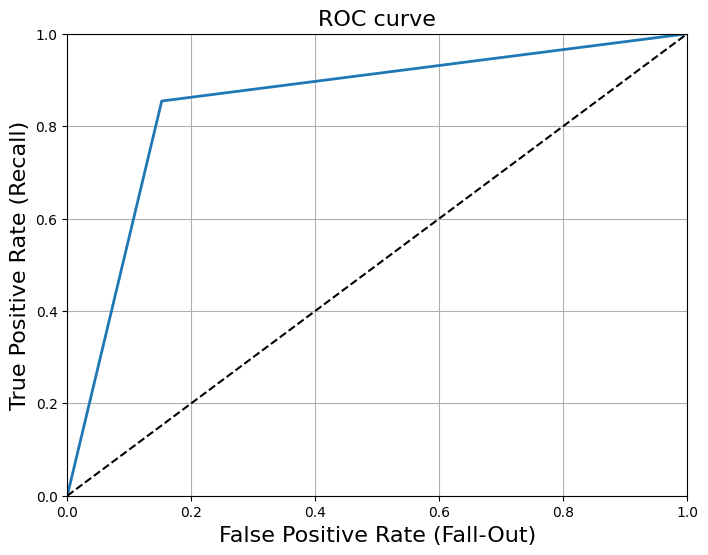

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, adaboost_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

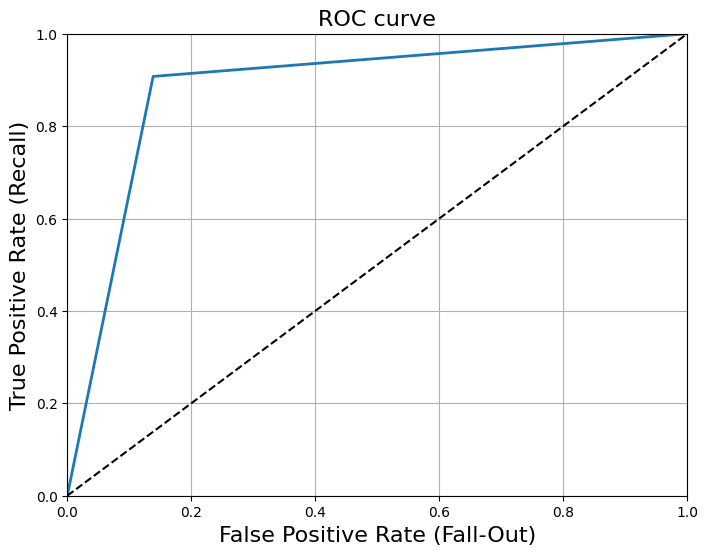

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, catboost_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

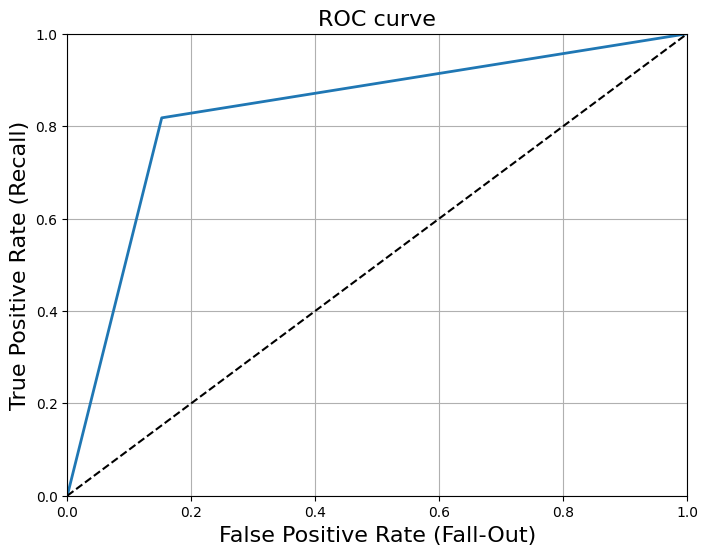

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, decisiontree_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

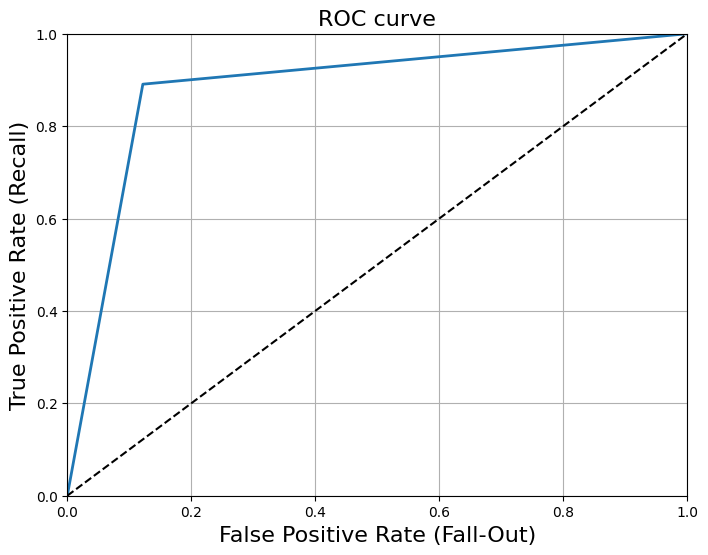

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, randomforest_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

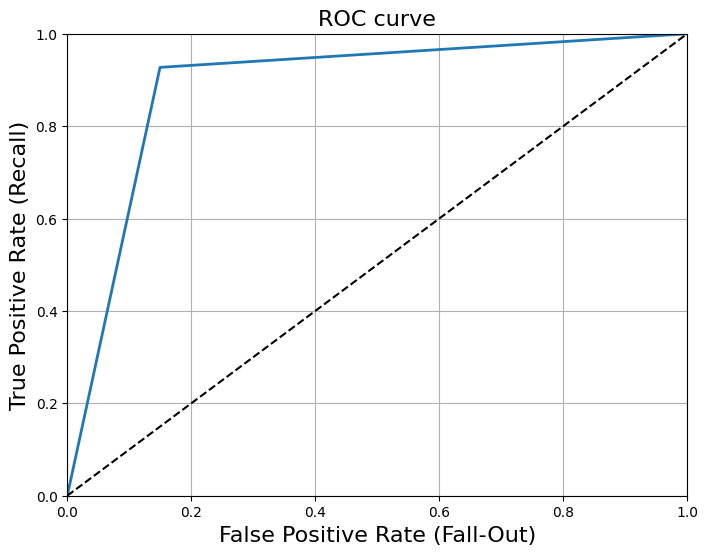

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, lightgbm_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

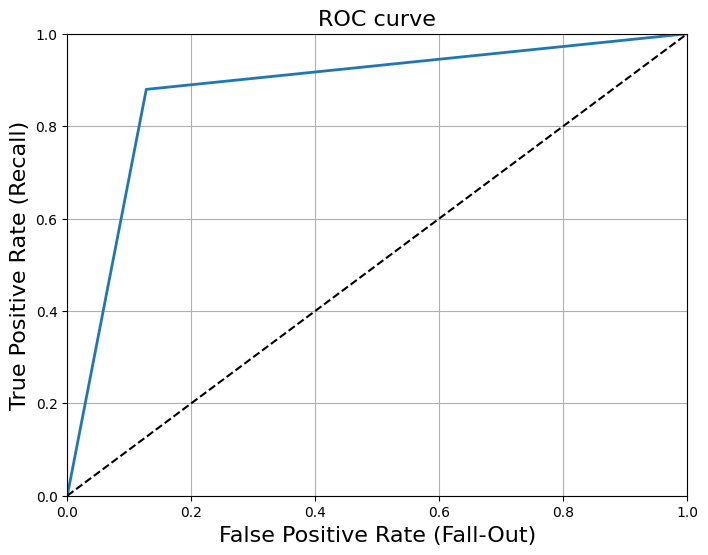

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, xgboost_predicted_target)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()